In [90]:
# PyTorch Workflow

In [91]:
import torch
from torch import nn ## nn contains all of PyTorch's building blocks for neural network
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.1.0+cu121'

## 1. Data(Preparing and Loading)

Data can be almost anything in ML

* Excel Spreadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* Audio likes songs or podcasts
* DNA
* Text

Macine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in the numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a strainght line with known parameters.

In [92]:
# Create *known* parameters

weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [93]:
X.shape, y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [94]:
X.ndim, y.ndim

(2, 2)

#### Splitting Data into training and test sets

In [95]:
 # Create a train/test split

 train_split = int(0.8*len(X))
 train_split

40

In [96]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [97]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and comapres predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b',s=4,label='Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c='g',s=4,label='Testing data')

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

  # Show the legend
  plt.legend(prop={'size':14})

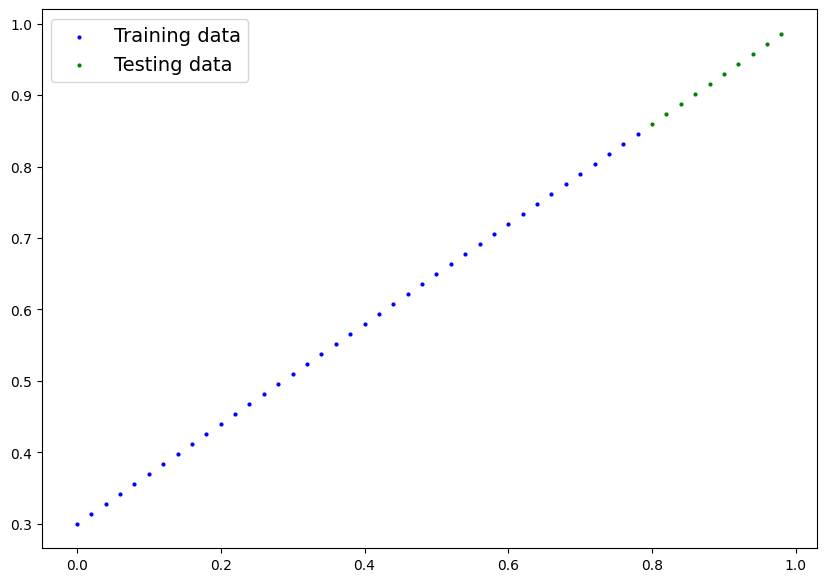

In [98]:
 plot_predictions()

## 2. Build Model

Our First PyTorch model !!!!


What our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias)values we used to create the data.


How does it do so:

Through two main algorithms:
1. Gradiet descent
2. Backpropagation


In [99]:
from torch import nn
# Create linear regression model class

class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch enherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor)-> torch.Tensor: # 'x' is the input data
    return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essestionals

* torch.nn - contains all of the buildings for computational graphs Aka neural networks.
* torch.nn.Parameter - what parameters should our model try and learn, ofter a Pytorch layer from torch.nn will set these for us
* torch.nn.module - the base class for all neural network modules, of you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in Pytorch live, they will help with gradient descent
* def forward() - All nn.module sublcasses require you to overwrite forward(), this method defines what happens in the forward computation.

### Checking the contents of our PyTorch model

using .parameters()

In [100]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)

model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [101]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using 'torch.inference_mode()'

To check our model's predictive power, let's see how well it predict y_test based on X_test



In [102]:
# Make predictions with model
with torch.inference_mode(): # Turns off gradient tracking (make code faster as we dont requrire while testing)
  y_preds = model_0(X_test)

y_preds

# Or we can use 'with torch.no_grad()', however, inference_mode() is preferred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [103]:
# Comparing with y_test
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

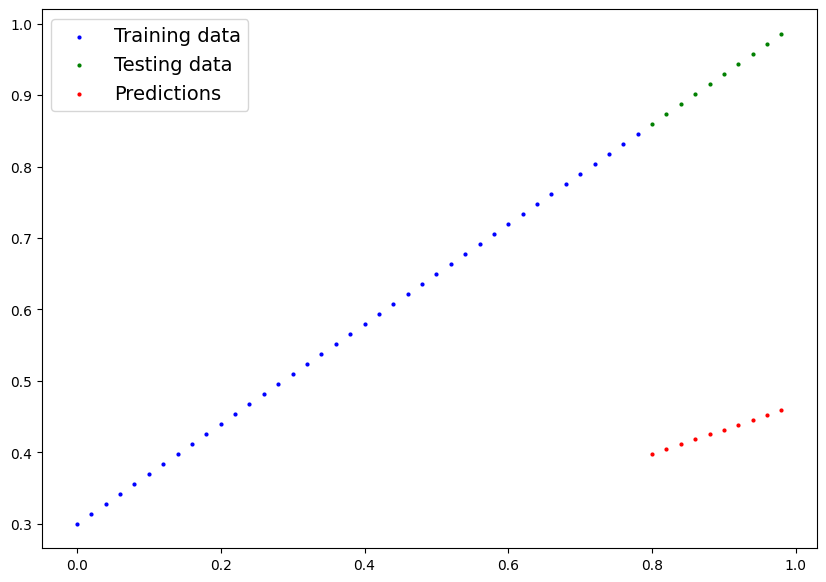

In [104]:
plot_predictions(predictions=y_preds)

### 3. Train model

* The whole idea of training is for a model to move from some unknown parameters to some known parameters.

* One way to measure how poor or how wrong your model predictions are to use loss function.

* Note : Loss function/Cost function/ criterion

Things we need to train:

* **Loss Function:** A function to measure how wrong your model prediction are from true parameters, lower is better.

* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters(e.g. weight & bias in our case) to improve the loss function.
- Inside optimiser:
  * params - the model parameters you like to optimize, for example params=model_0.paramters()
  * lr - Learning rate is a hyperparamters that defines how big/small the otpmizer changes the paramters with each step ( a small lr results in small changes, whereas a large lr results in large change)

And specifically for PyTorch, we need:
* A training loop
* A testing loop


In [105]:
list (model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [106]:
# Check out our model's parameters(a parameter is a vlaue that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [107]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most importatnt hyperparameter you can set

In [108]:
# Note :
# For a regression problem like ours, a loss function of nn.L1Loss() and optimzer like torch.optim.SGD() will suffice
# But for a classification problem like classifying whether a photo is of a dog or a cat, we likely want to use a loss function of nn.BCELoss() (binary cross entropy loss).

### Building a training loop and a testing loop in PyTorch

Things we need in a training loop:
0. Loop through the data

1. Forward pass (this involves data moving through our models forward() functions) to make predictions on data- aka forward propagation.

2. Calculate the loss (compare forward pass predictions to ground truth labels)

3. Optimizer zero grad

4. Loss backward - move backwards through the network to calculate the gradients of each of the paramters of our model with respect to the loss.- **backpropagation**

5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss.- **gradient descent**

In [109]:
# An epoch is one loop through the data.... (this is a hyperparamters bcz we set it)
epochs = 201

# Track different values
epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameter that requires gradients to require gradients

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)


  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step() # by default how the optimizer changes will acculumate throught the loop so.. we have to zero then above in step 3 for next iteration


  model_0.eval() # turns off different setting in the model not needed for evaluation/testing(i.e. dropout/batch norms layers)
  with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scene
    # 1. Forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening every 10 epochs
  if epoch%10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')
    # Print out model state_dict()
    print(model_0.state_dict())



Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

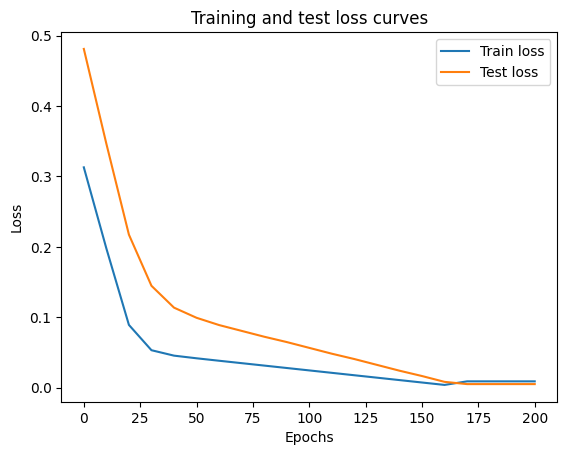

In [110]:
# Plot the loss curves
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt .plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend();
#plt.show( )

In [111]:
with torch.inference_mode():
  y_pred_new = model_0(X_test)

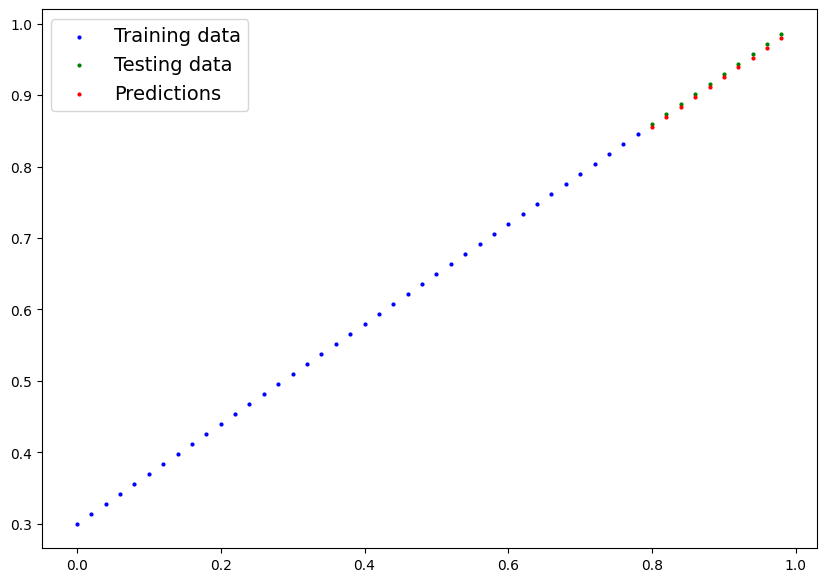

In [112]:
plot_predictions(predictions=y_pred_new)

### Saving a model in PyTorch

There are three main methods for saving and loading models in PyTorch.

1. torch.save() - allows save a PyTorch object in Python's pickle format

2. torch.load() - allows you load a saved PyTorch object

3. torch.nn.Module.load_state_dict() -  this allows to load a model's saved state dictionary

In [113]:
 # Saving our PyTorch model

 from pathlib import Path

 # 1. Create models directory
 MODEL_PATH = Path('models')
 MODEL_PATH.mkdir(parents=True,exist_ok=True)

 # 2. Create model save path
 MODEL_NAME = '01_pytorch_workflow_model_0.pth'
 MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

 # 3. Save the model state dict
 print(f'Saving model to: {MODEL_SAVE_PATH}')
 torch.save(obj=model_0.state_dict(),
            f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [114]:
!ls -1 models

01_pytorch_workflow_model_0.pth


### Loading a PyTorch model

Since we saved our model's state_dict() rather then entire model, we'll create a new instance of our model class and load the saved state_dict() into that.

In [115]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [116]:
# To load in a saved state_dict we have to instantiate a new instance of our model class

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [117]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [118]:
# Make some predictions with our loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [119]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8554],
        [0.8693],
        [0.8832],
        [0.8971],
        [0.9110],
        [0.9249],
        [0.9388],
        [0.9527],
        [0.9666],
        [0.9805]])

In [120]:
# Compare loaded model preds with original model preds

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

Let'go back through the steps above and see it all in oe place.

In [121]:
# Import pytorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

# Check pytorch version
torch.__version__

'2.1.0+cu121'

Create device-agnostic code

This means if we have access to a gpu, our code will use it.
if No gpu is avialable, the code will default to using CPU.

In [122]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available else 'cpu'
print(f'Usng device: {device}')

Usng device: cuda


### 6.1 Data

In [123]:
# Create some data using the linear regression formula of y = w*X +b

weight = 0.7
bias = 0.3


# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight*X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [124]:
# Split data

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

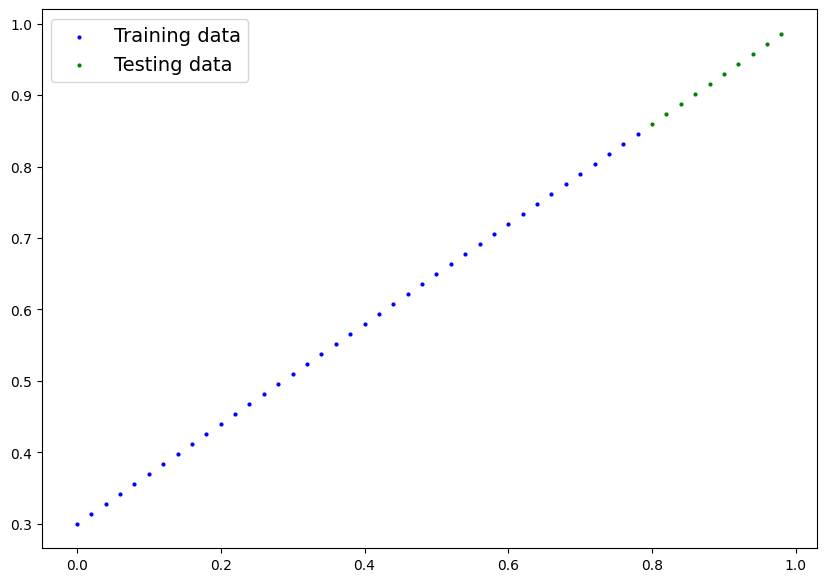

In [125]:
# Plot the data

plot_predictions(X_train, y_train, X_test, y_test)

## 6.2 Building a pytorch linear model

In [126]:
# Create a linear model by subclasssing nn.Module

class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / linear transform
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# Set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [127]:
# Checl the model current device
next(model_1.parameters()).device

device(type='cpu')

In [128]:
# Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

### 6.3 Training

For training we need:
* Loss function
* Optimizer - Optimize the parameter of model which reduce loss function
* Training loop
* Testing loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our otimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 201

# Put data on the target device (device agnostic code for data)
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_1.train()

  #1. forward pass
  y_pred = model_1(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out what's happening

  if epoch % 10 == 0:
    print(f'Epoch: {epoch}| Loss: {loss}| Test loss: {test_loss}')

In [ ]:
model_1.state_dict()

In [ ]:
weight, bias

### 6.4 Making and evaluating predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# Make precitions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

In [ ]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds.cpu())

### 6.5 Saving and loading a trained model

In [ ]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to:{MODEL_SAVE_PATH}')
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
# Load a Pytorch

# Create a new instance of linear regression model V2
loaded_model_1 = LinearRegressionModelV2()

# Load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put the loaded model to device
loaded_model_1.to(device)

In [ ]:
next(loaded_model_1.parameters()).device

In [ ]:
loaded_model_1.state_dict()

In [ ]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds